# Ashley Mersman
## Task3_NYC_Mersman
2/22/2023

## Task 3
1. Follow the instructions to load NY City January high temperature from a csv file into a DataFrame.
2. Follow the instructions to view head and tail of the file. 
3. Follow the instructions to clean the data.
4. Use describe() to calculate basic descriptive statistics for the dataset. 
5. Use the SciPy stats module linregress function to calculate slope and intercept for the best fit line through the data.
6. Use your results to predict the "average high temp in Jan" for the year 2026. 
7. Follow the instructions and use Seaborn to generate a scatter plot with a best fit line. Set the axes and y limit as instructed.
8. In the same notebook, continue with 15.4 (staring page 620). 
9. This time, we'll use scikit-learn estimator, and we'll practice splitting data for training (to build a model) and testing (testing our model against known values). 
- Follow the instructions all the way though charting it again with the specified axes.
- At the end of your notebook add some remarks comparing the two methods. 
- By now, you know to include the title, your name, and section headings (always!) and to tell an engaging story with data, so we won't remind you.


In [1]:
#import pandas
import pandas as pd


## 1. Load Dataset 

In [2]:
#load the dataset into a pandas DataFrame 
nyc =pd.read_csv('nyc.csv')


## 2. View Head and Tail of Data

In [3]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [4]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


## 3. Data Cleaning

In [5]:
#rename columns
nyc.columns= ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [6]:
#check column type
nyc.Date.dtype

dtype('int64')

In [7]:
#Divide by 100 to truncate the last 2 digits and we will have the Date as year
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


## 4.Use describe() to calculate basic descriptive statistics for the dataset.

In [8]:
pd.set_option('precision', 2)
nyc.describe()

,Date,Temperature,Anomaly
count,124.00,124.00,124.00
mean,1956.50,37.60,0.20
std,35.94,4.54,4.54
min,1895.00,26.10,-11.30
25%,1925.75,34.58,-2.82
50%,1956.50,37.60,0.20
75%,1987.25,40.60,3.20
max,2018.00,47.60,10.20


## 5. Use the SciPy stats module linregress function to calculate slope and intercept for the best fit line through the data.

In [9]:
#import scipy stats module
from scipy import stats

In [10]:
#use stats.linregress to calculate slope and intercept
linear_regression = stats.linregress(x=nyc.Date, y = nyc.Temperature)

In [11]:
slope = linear_regression.slope
slope

0.014771361132966163

In [12]:
intercept = linear_regression.intercept
intercept

8.694993233674289

## 6. Use your results to predict the "average high temp in Jan" for the year 2026.

In [13]:
nyc_2026 = round(slope * 2026 + intercept,2)
print(f'The predicted average high temperature for 2026 in NYC is {nyc_2026}.')

The predicted average high temperature for 2026 in NYC is 38.62.


## 7. Follow the instructions and use Seaborn to generate a scatter plot with a best fit line. Set the axes and y limit as instructed.

In [14]:
#import seaborn
import seaborn as sns

(10.0, 70.0)

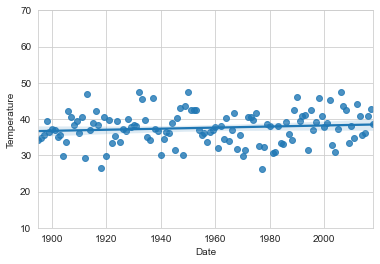

In [15]:
#use seaborn to plot data with best-fit regression line with y axis from 10,70
sns.set_style('whitegrid')

axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10,70)

## 8. In the same notebook, continue with 15.4 (staring page 620).

In [16]:
#import sklearn 
from sklearn.model_selection import train_test_split

In [17]:
#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1,1), nyc.Temperature.values, random_state=11)

In [18]:
#confirm split
X_train.shape

(93, 1)

In [19]:
X_test.shape

(31, 1)

 **Train the model**

In [20]:
#import LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [21]:
#fit the model
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [22]:
#get slope from model
m = linear_regression.coef_
m

array([0.01939167])

In [23]:
#get intercept from model
b = linear_regression.intercept_
b

-0.30779820252658396

**Test the model**

In [24]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip (predicted[::5], expected[::5]):
    print(f'predicted: {p: .2f}, expected: {e: .2f}')

predicted:  37.86, expected:  31.70
predicted:  38.69, expected:  34.80
predicted:  37.00, expected:  39.40
predicted:  37.25, expected:  45.70
predicted:  38.05, expected:  32.30
predicted:  37.64, expected:  33.80
predicted:  36.94, expected:  39.70


**Predicting future  and estimating past temperatures**

In [25]:
predict = (lambda x: m * x + b)

In [26]:
predict(2019)

array([38.84399018])

In [27]:
predict(1890)

array([36.34246432])

**Visualize the Dataset using sns**

(10.0, 70.0)

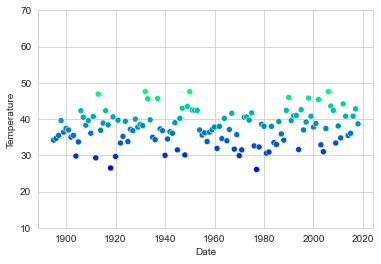

In [28]:
import seaborn as sns
axes= sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10,70)

**add regression line**

In [29]:
#import numpy
import numpy as np

In [30]:
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y=predict(x)

In [31]:
#import matplotlib.pyplot
import matplotlib.pyplot as plt

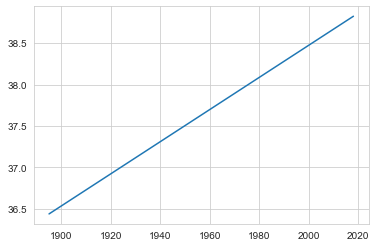

In [32]:
line = plt.plot(x,y)

**combine the two charts to plot scatterplot with the regression line**

(10.0, 70.0)

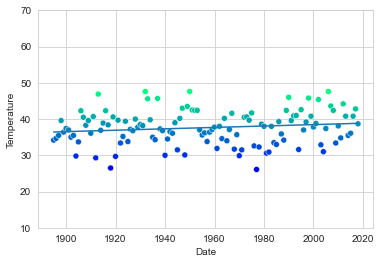

In [33]:

axes= sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
line = plt.plot(x,y)
axes.set_ylim(10,70)

*The models give similar results though the models themselves give different slopes and intercepts. The graphs show that the regression line is similar. Using seaborn allows us to give more detail in the visualization by adding hue as a characteristic. 